# MSA Project 2

# 1. Data Understanding and Preparation

### 1A. Load the dataset and inspect its structure.

Imports

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cluster import KMeans
from statsmodels.stats.weightstats import ztest
import plotly.express as px
import nbformat
import re

Configs

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
mydf = pd.read_csv("/Users/tanweerashif/Studies/MSA_Analytics (PR)/Assignment/2/Marketing-Customer-Value-Analysis.csv")

In [4]:
mydf.shape

(9134, 24)

In [5]:
mydf.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
mydf.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
# Check unique values accross the columns
for i in mydf.columns:
    print(i,":")
    print(mydf[i].unique(),"\n")

Customer :
['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826'] 

State :
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon'] 

Customer Lifetime Value :
[ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866] 

Response :
['No' 'Yes'] 

Coverage :
['Basic' 'Extended' 'Premium'] 

Education :
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'] 

Effective To Date :
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1

### Perform data cleaning, handling any missing values or inconsistencies.

In [9]:
# Count the null values for each columns
mydf.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [10]:
# Count the na values for each columns
mydf.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [11]:
# Check if any duplicate rows are present
print(mydf.duplicated().sum())

0


In [12]:
mydf.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'], dtype='object')

Split the dataset into features and target (Customer Lifetime Value (CLV))

In [13]:
mydf_feat = mydf.drop(columns=['Customer Lifetime Value'])
mydf_feat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [14]:
mydf_tar = mydf['Customer Lifetime Value']
mydf_tar

0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: Customer Lifetime Value, Length: 9134, dtype: float64

### Generate summary statistics to understand the distribution of the data.

In [15]:
mydf.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Exploratory Data Analysis (EDA)

### 2A. Analyze the relationship between Customer Lifetime Value and other variables such as Income, Education, Employment Status, Policy Type, and Vehicle Class.

### 2B. Visualize the data using appropriate plots (e.g., histograms, scatter plots, box plots) to identify patterns and trends.

In [16]:
# Check all columns
allcol = mydf.columns.tolist()
allcol

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [17]:
# Check the non-numerical data
catcol = mydf.select_dtypes(include=['object']).columns.tolist()
catcol

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [18]:
# Numerical columns
numcol = [item for item in allcol if item not in catcol]
numcol

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

CLV vs Income Analysis

<Axes: xlabel='Customer Lifetime Value', ylabel='Count'>

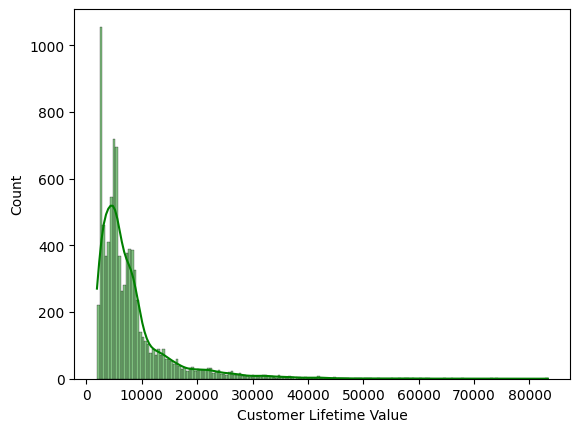

In [19]:
sns.histplot(mydf['Customer Lifetime Value'], kde=True, color='green', label='Customer Lifetime Value (CLV)')

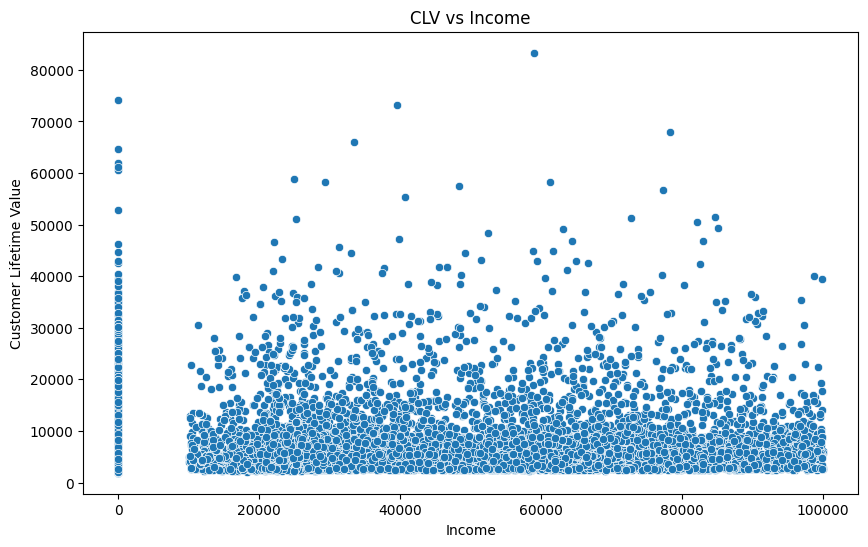

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Customer Lifetime Value', data=mydf)
plt.title('CLV vs Income')
plt.show()

Insights

From the above plot of CLV and Income, following conclusions can be made:
1. The customers with the highest income have low lifetime (below 10,000 CLV).
2. Most of the clustering of CLV with respect to income is occuring within the CLV range of 10,000.
3. Most customers are resulting in minimum CLV.

CLV vs Education

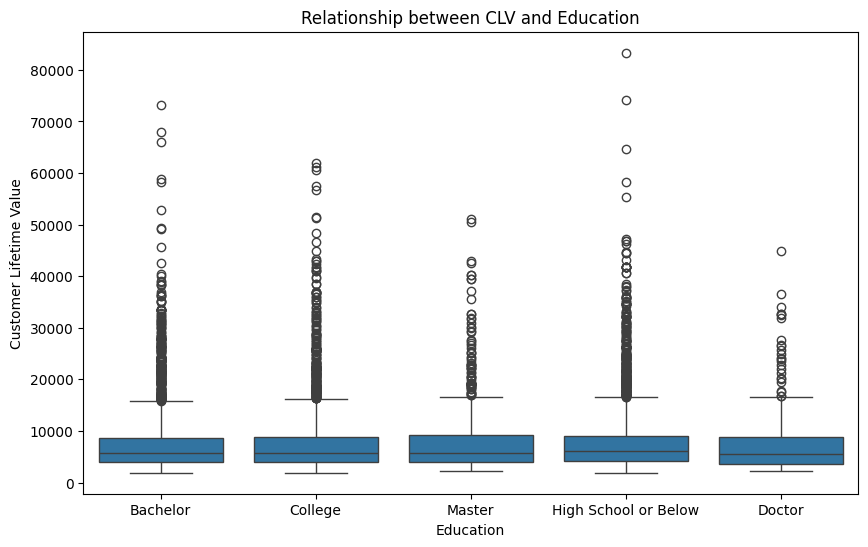

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=mydf, x='Education', y='Customer Lifetime Value')
plt.title('Relationship between CLV and Education')
plt.xlabel('Education')
plt.ylabel('Customer Lifetime Value')
plt.show()

In [22]:
avg_clv_education = mydf.groupby('Education')['Customer Lifetime Value'].mean().reset_index()
avg_clv_education

,Education,Customer Lifetime Value
0,Bachelor,7872.660412
1,College,7851.064644
2,Doctor,7520.344837
3,High School or Below,8296.709033
4,Master,8243.484692


Insight:
1. The box plot illustrates the relationship between CLV and different education levels. Different education levels have varying distributions of CLV, indicating some level of influence on CLV.
2. Beyond 17,000 CLVs are outliers.
4. Average CLV is highest for customers with high school or below degree followed by persons with Masters Degree.

CLV vs Employement Status

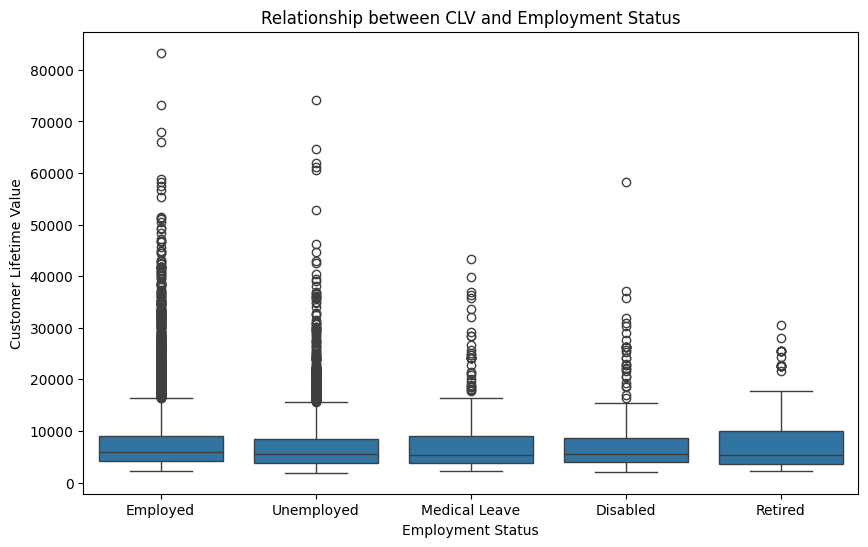

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=mydf, x='EmploymentStatus', y='Customer Lifetime Value')
plt.title('Relationship between CLV and Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Customer Lifetime Value')
plt.show()

In [24]:
avg_clv_employment = mydf.groupby('EmploymentStatus')['Customer Lifetime Value'].mean().reset_index()
avg_clv_employment

,EmploymentStatus,Customer Lifetime Value
0,Disabled,7847.889354
1,Employed,8219.117754
2,Medical Leave,7641.822437
3,Retired,7487.865141
4,Unemployed,7636.319761


Insights:
1. The box plot shows the relationship between CLV and different employment statuses. There are noticeable differences in CLV distributions across employment statuses, suggesting that employment status impacts CLV.
2. CLV spread is more in the Q3 range for retired customers.
3. Average CLV is highest for the employed people.

CLV vs Gender

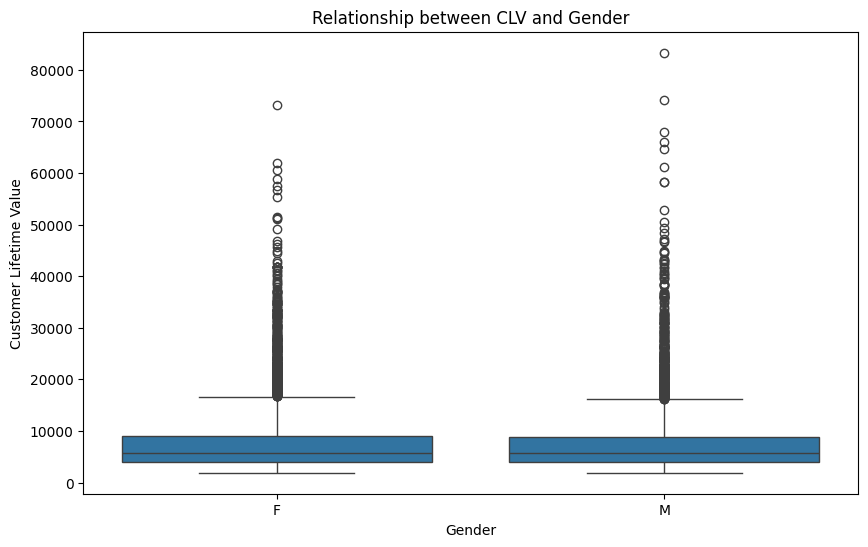

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=mydf, x='Gender', y='Customer Lifetime Value')
plt.title('Relationship between CLV and Gender')
plt.xlabel('Gender')
plt.ylabel('Customer Lifetime Value')
plt.show()

In [26]:
avg_clv_gender = mydf.groupby('Gender')['Customer Lifetime Value'].mean().reset_index()
avg_clv_gender

,Gender,Customer Lifetime Value
0,F,8096.602370
1,M,7909.551488


Insight:
1. Q1 and Q3 spread are similar for CLV for both males and females.
2. Male has more CLV outliers.
3. Female average CLV is higher than that of male.

CLV vs Policy type

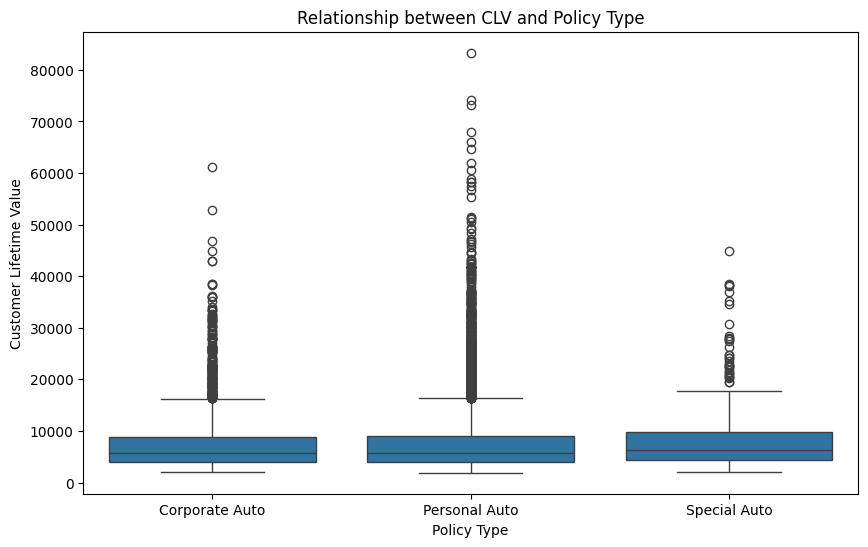

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=mydf, x='Policy Type', y='Customer Lifetime Value')
plt.title('Relationship between CLV and Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Customer Lifetime Value')
plt.show()

In [28]:
avg_clv_ptype = mydf.groupby('Policy Type')['Customer Lifetime Value'].mean().reset_index()
avg_clv_ptype

,Policy Type,Customer Lifetime Value
0,Corporate Auto,7814.409552
1,Personal Auto,8027.363535
2,Special Auto,8594.245038


Insight:

1. Average CLV is highest for the policy type 'Special Auto'.
2. Personal Auto policy type has most number of outliers.

CLV vs Vehicle Class

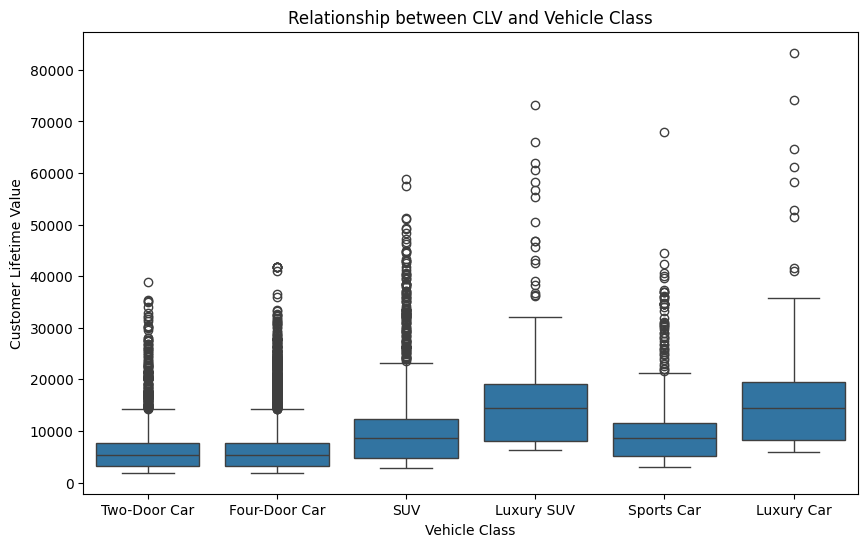

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=mydf, x='Vehicle Class', y='Customer Lifetime Value')
plt.title('Relationship between CLV and Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Customer Lifetime Value')
plt.show()

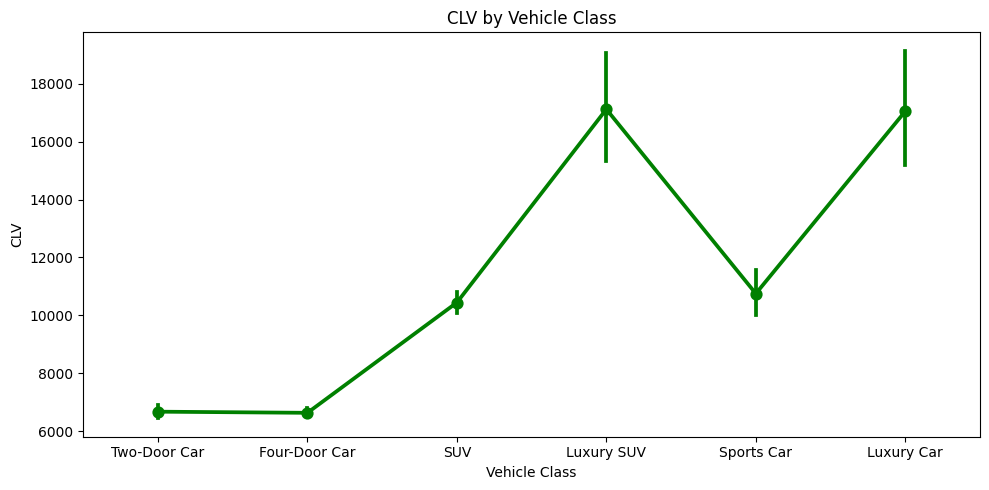

In [30]:
plt.figure(figsize=(10, 5))
sns.pointplot(x='Vehicle Class', y='Customer Lifetime Value', data=mydf, color='green', markers='o')
plt.title('CLV by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('CLV')
plt.tight_layout()
plt.show()

In [31]:
avg_clv_vclass = mydf.groupby('Vehicle Class')['Customer Lifetime Value'].mean().reset_index()
avg_clv_vclass

,Vehicle Class,Customer Lifetime Value
0,Four-Door Car,6631.726607
1,Luxury Car,17053.348399
2,Luxury SUV,17122.999134
3,SUV,10443.511816
4,Sports Car,10750.989331
5,Two-Door Car,6671.030732


Insight:

1. Customers with 'Luxury SUV' and 'Luxury Car' have the highest CLV values which is around 17,000.
2. Customers with 'Two-Door Car' and 'Four-Door Car' have the lowest CLV values, around 6,500.
3. The box plot as well indicates the higher spread of CLVs for cars 'Luxury SUV' and 'Luxury Car'.
4. Average CLV is highest for 'Luxury SUV'.

CLV vs all other vairables -  heatmap

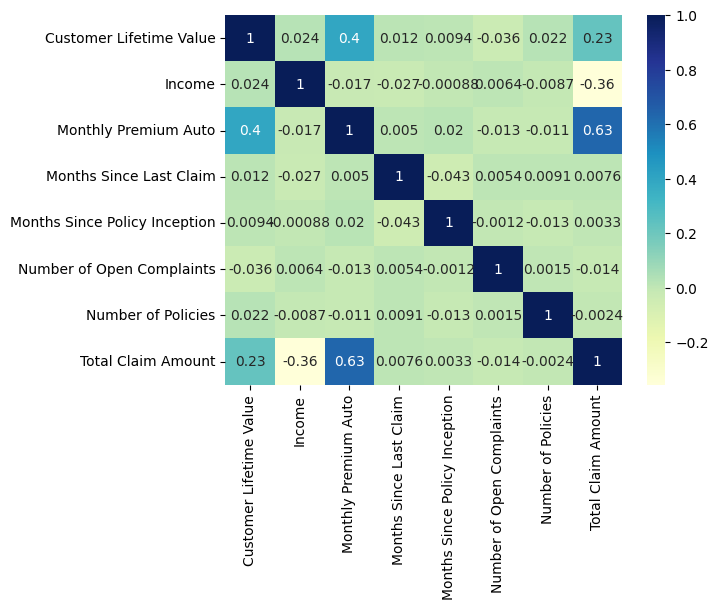

In [32]:
dataplot = sns.heatmap(mydf[numcol].corr(), cmap="YlGnBu", annot=True)

Insights:

1. The heatmap provides a correlation matrix for the numerical variables. The correlation coefficient between CLV and Income is relatively low, indicating a weak linear relationship.
2. Strongest correlations is Monthly premium auto and total claim amount.
3. Some variables are negatively correlated as well. For example - income and number of policies.

Univariate analysis - histogram

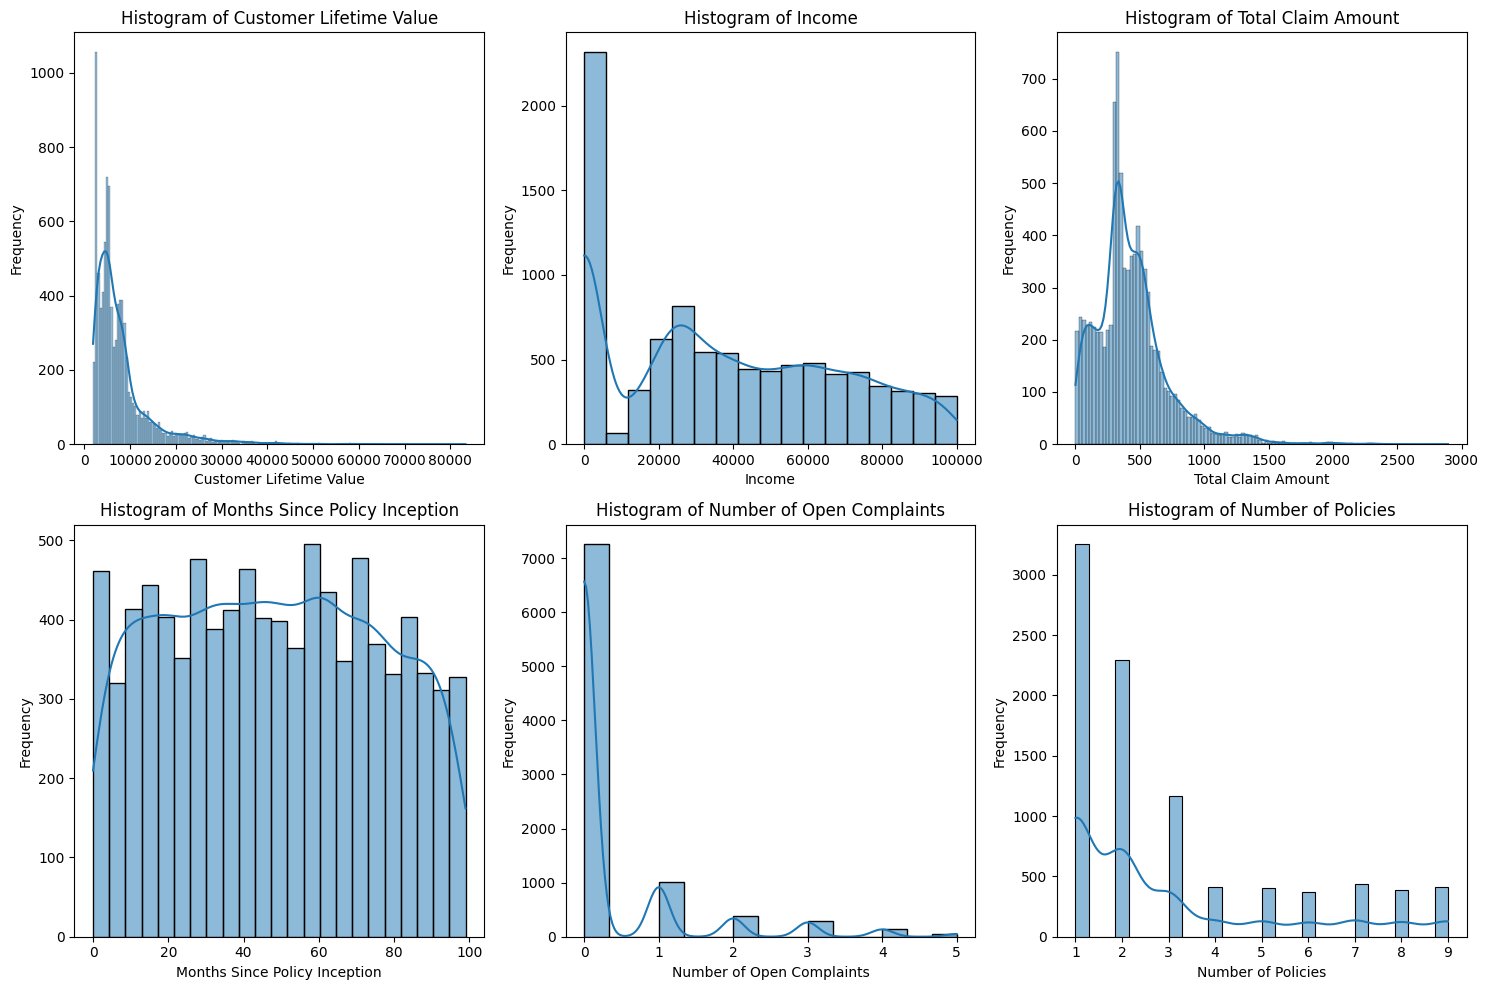

In [33]:
# List of important columns to visualize using histograms
important_columns = [
    'Customer Lifetime Value',
    'Income',
    'Total Claim Amount',
    'Months Since Policy Inception',
    'Number of Open Complaints',
    'Number of Policies'
]

# Plotting histograms for each important column
plt.figure(figsize=(15, 10))

for i, column in enumerate(important_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(mydf[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Insight:
1. Customer Lifetime Value (CLV)
    1. Distribution: The histogram of Customer Lifetime Value is highly skewed to the right, indicating that most customers have a lower CLV, while a few have a significantly higher CLV.
    2. Frequency: The majority of customers have a CLV below $10,000, with a sharp decline in frequency as the CLV increases.
    3. Insight: This suggests that a small proportion of customers are highly valuable, while the majority contribute less to the overall lifetime value.
2. Income
    1. Distribution: The histogram for Income shows a right skew as well, but with a relatively large number of customers having very low income.
    2. Frequency: There is a high frequency of customers with income close to $0, and the frequency decreases as income increases.
    3. Insight: A significant portion of the customer base has lower income levels, which could impact purchasing power and, subsequently, their customer lifetime value and claim amounts.
3. Total Claim Amount
    1. istribution: The Total Claim Amount histogram is also right-skewed, with most claims being relatively low.
    2. Frequency: The frequency of claims peaks at the lower end of the scale and tapers off quickly as the claim amount increases.
    3. Insight: This suggests that while most claims are small, there are occasional large claims. The company may need to consider this distribution in risk assessment and premium calculations.
4. Months Since Policy Inception
    1. Distribution: The histogram for Months Since Policy Inception appears to be relatively uniform, with a slight dip around the middle months.
    2. Frequency: The frequency is relatively consistent across the months, though there are slight variations.
    3. Insight: Customers seem to have policies that were initiated across a broad range of timeframes, suggesting steady acquisition over time without significant spikes or drops.
5. Number of Open Complaints
    1. Distribution: The histogram for the Number of Open Complaints is heavily right-skewed, with the vast majority of customers having zero open complaints.
    2. Frequency: Most customers have no open complaints, and only a small fraction has one or more open complaints.
    3. Insight: This indicates good customer satisfaction overall, with very few customers experiencing issues significant enough to lodge complaints.
6. Number of Policies
    1. Distribution: The histogram for the Number of Policies is right-skewed, with most customers having one policy.
    2. Frequency: There is a high frequency of customers with only one policy, and the frequency decreases significantly as the number of policies increases.
    3. Insight: Most customers hold only one policy, suggesting potential opportunities for cross-selling and up-selling additional policies to existing customers.

# Customer Segmentation

### Segment customers based on key attributes (e.g., Income, Policy Type, Vehicle Class) and analyze the average CLV for each segment.

Handle categorical variables by encoding

In [34]:
data_encoded = pd.get_dummies(mydf, columns=['Policy Type', 'Vehicle Class'], drop_first=True)

Choose key attributes for clustering


In [35]:
features = ['Income', 'Policy Type_Personal Auto',
            'Policy Type_Special Auto', 'Vehicle Class_Luxury Car', 'Vehicle Class_Luxury SUV',
            'Vehicle Class_SUV', 'Vehicle Class_Sports Car', 'Vehicle Class_Two-Door Car']

Standardize the features


In [36]:
my_scaler = StandardScaler()
data_scaled = my_scaler.fit_transform(data_encoded[features])

Do K-means clustering

In [37]:
kmeans = KMeans(n_clusters=2)
mydf['Cluster'] = kmeans.fit_predict(data_scaled)

Do CLV analysis


In [38]:
cla = mydf.groupby('Cluster')['Customer Lifetime Value'].mean().reset_index()

Plot for each segment

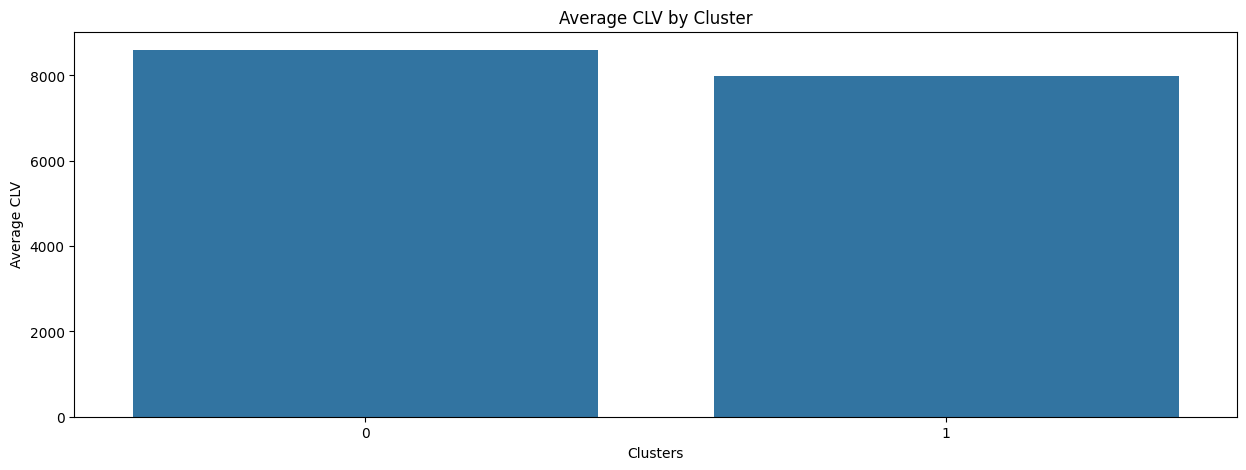

In [39]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Cluster', y='Customer Lifetime Value', data=cla)
plt.title('Average CLV by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Average CLV')
plt.show()

### Identify the most valuable customer segments.

Identify the important segments

In [40]:
imp_seg = cla.sort_values(by='Customer Lifetime Value', ascending=False)

Display the important customer segments

In [41]:
print(imp_seg)

   Cluster  Customer Lifetime Value
0        0              8594.245038
1        1              7979.499963


# Insights and Recommendations

### Summarize the key findings from your analysis.

From the CLV vs Income analysis, following conclusions can be made:
1. The customers with the highest income have low lifetime (below 10,000 CLV).
2. Most of the clustering of CLV with respect to income is occuring within the CLV range of 10,000.
3. Most customers are resulting in minimum CLV.

From the CLV vs education level analysis, following conclusions can be made:
1. The box plot illustrates the relationship between CLV and different education levels. Different education levels have varying distributions of CLV, indicating some level of influence on CLV.
2. Beyond 17,000 CLVs are outliers.
4. Average CLV is highest for customers with high school or below degree followed by persons with Masters Degree.

From the CLV vs employment status analysis, following conclusions can be made:
1. The box plot shows the relationship between CLV and different employment statuses. There are noticeable differences in CLV distributions across employment statuses, suggesting that employment status impacts CLV.
2. CLV spread is more in the Q3 range for retired customers.
3. Average CLV is highest for the employed people.

From the CLV vs Gender analysis, following conclusions can be made:
1. Q1 and Q3 spread are similar for CLV for both males and females.
2. Male has more CLV outliers.
3. Female average CLV is higher than that of male.

From the CLV vs policy type analysis, following conclusions can be made:

1. Average CLV is highest for the policy type 'Special Auto'.
2. Personal Auto policy type has most number of outliers.

From the CLV vs vehicle class analysis, following conclusions can be made:

1. Customers with 'Luxury SUV' and 'Luxury Car' have the highest CLV values which is around 17,000.
2. Customers with 'Two-Door Car' and 'Four-Door Car' have the lowest CLV values, around 6,500.
3. The box plot as well indicates the higher spread of CLVs for cars 'Luxury SUV' and 'Luxury Car'.
4. Average CLV is highest for 'Luxury SUV'.

From the Heatmap analysis, following conclusions can be made:

1. The heatmap provides a correlation matrix for the numerical variables. The correlation coefficient between CLV and Income is relatively low, indicating a weak linear relationship.
2. Strongest correlations is Monthly premium auto and total claim amount.
3. Some variables are negatively correlated as well. For example - income and number of policies.

From the univariate histogram analysis, following conclusions can be made:
1. Skewness and Distribution: Many of the variables exhibit right skewness, suggesting that the majority of values are clustered at the lower end, with a few outliers at the higher end. This is evident in Customer Lifetime Value, Income, Total Claim Amount, Number of Open Complaints, and Number of Policies.
2. Customer Segmentation: There is a clear indication that customer segments differ significantly in terms of income and their contribution to profits (CLV). The data suggests the presence of a small group of highly profitable customers.
3. Risk and Satisfaction: The low number of open complaints suggests good customer service and satisfaction levels, which is a positive sign for the business.

From the K-means clustering analysis, following conclusions can be made:
1. Cluster 0:
    1. The centroid for Cluster 0 has a Customer Lifetime Value (CLV) of approximately 8594.25.
    2. This means that the average CLV of the data points assigned to Cluster 0 is around $8594.25.
    3. Interpretation: Customers in this cluster tend to have higher lifetime values compared to the other cluster.
2. Cluster 1:
    1. The centroid for Cluster 1 has a Customer Lifetime Value (CLV) of approximately 7979.50.
    2. This means that the average CLV of the data points assigned to Cluster 1 is around $7979.50.
    3. Interpretation: Customers in this cluster tend to have slightly lower lifetime values compared to Cluster 0.

### Provide actionable recommendations for improving customer value based on the insights gained from the data.

In the presentation!